In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('headbrain.csv')

In [3]:
df.shape

(237, 4)

In [4]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [6]:
# 1. calculate mean of x and y
mean_x = np.mean(X)
mean_y = np.mean(y)

In [7]:
mean_x, mean_y

(3633.9915611814345, 1282.873417721519)

In [8]:
# 2. calculate slope and intercept
n = len(X)
numer = 0
denom = 0

for i in range(n):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
slope = numer/denom
intercept = mean_y - slope * mean_x

In [9]:
slope, intercept

(0.26342933948939945, 325.57342104944223)

In [10]:
# 3. calculate predictions using y = mx + c
predictions = []
for i in range(n):
    y_pred = slope * X[i] + intercept
    predictions.append(int(y_pred))

In [11]:
y[:10]

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375],
      dtype=int64)

In [12]:
predictions[:10]

[1514, 1310, 1448, 1320, 1425, 1269, 1322, 1263, 1277, 1374]

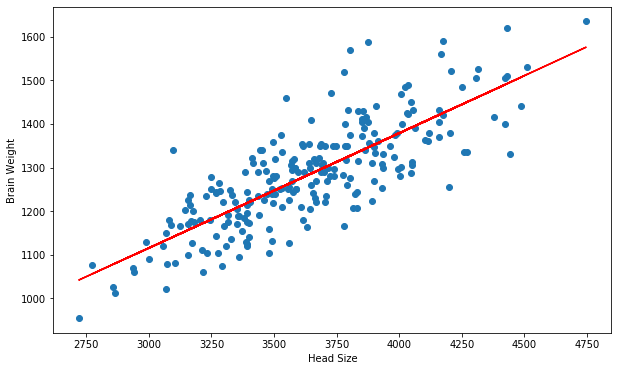

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions,'red')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.show()

In [14]:
# 4. Calculate Error

error = 0
for i in range(n):
    error += (predictions[i] - y[i]) ** 2

mse = error / n
print("Mean Squared Error",mse)

Mean Squared Error 5202.9029535864975


In [15]:
# RMSE -> Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error",rmse)

Root Mean Squared Error 72.13115106239812


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X = np.reshape(X, (-1,1))
X = scaler.fit_transform(X)

In [19]:
y = np.reshape(y, (-1,1))
y = scaler.fit_transform(y)

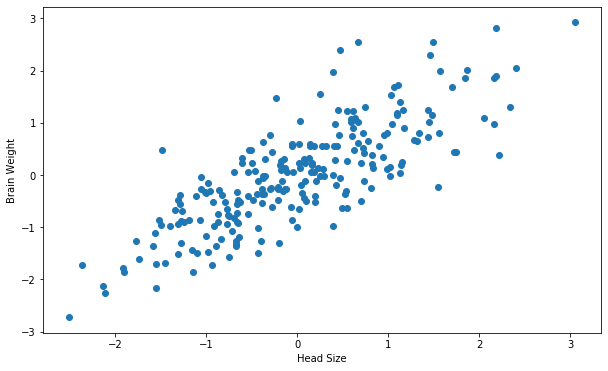

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.show()

In [22]:
X[:5], y[:5]

(array([[2.40886829],
        [0.28535333],
        [1.72023489],
        [0.39235214],
        [1.4897759 ]]),
 array([[ 2.0579083 ],
        [ 0.11763692],
        [ 0.43407603],
        [-0.00727325],
        [ 2.557549  ]]))

In [26]:
def gradientDescent(x,y,epochs,alpha):
    slope = 0
    inter = 0
    n = len(x)
    for epoch in range(epochs):
        y_pred = slope * x + inter
        loss = y_pred - y
        grad_slope = (2/n) * np.dot(loss.T, x)
        grad_inter = (2/n) * sum(loss)
        slope = slope - alpha * grad_slope
        inter = inter - alpha * grad_inter
        
    return slope, inter

In [53]:
epoch = 10000
alpha = 0.002
slope, intercept = gradientDescent(X,y,epoch,alpha)

In [54]:
slope, intercept

(array([[0.79956971]]), array([-3.11643819e-16]))

In [55]:
slope[0][0]

0.7995697092542826

In [56]:
# 3. calculate predictions using y = mx + c
predictions = []
for i in range(n):
    y_pred = slope[0][0] * X[i] + intercept[0]
    predictions.append(y_pred)

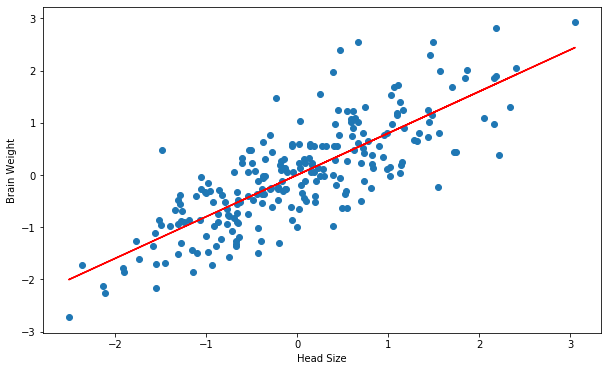

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions,'red')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.show()

In [58]:
error = 0
for i in range(n):
    error += (predictions[i] - y[i]) ** 2

mse = error / n
print("Mean Squared Error",mse)

Mean Squared Error [0.36068828]
